<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera y José Leonardo Aceves

**Fecha:** 14 de octubre del 2021.

**Expediente** : Leo: 712626 y Ana: 720567.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/leonardoaceves/ProyectoSPF_JLACEVES_AMAGUILERA

# Proyecto TEMA-2

## Proyecto Módulo 2- Guía.
> **Integrante 1:** José Leonardo Aceves González

> **Integrante 2:** Ana María Aguilera Gómez

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.

Wine and Spirits Sales in Constellation Brands

### 1.2 Objetivos.
> #### 1.1 Objetivo general:
>  - Generar pronósticos y simulaciones de ventas para aportar esquemas que ayuden a la toma de mejores desiciones.

> #### 1.2 Objetivos específicos:
>  - Encontrar la distribución de probabilidad de los cuatro nodos para obtener su correcta simulación correspondiente.

Nodos:

1. Sold-To Party State (Estado)
2. Order Quantity (Cantidad de cajas de botellas por orden)
3. Brand Name (Marca)
4. Varietal/Blend Description (Tipo de bebida)

### 1.3 Definición del problema.

Ambos miembros del equipo tenemos un empleo que involucra ventas. Ana está en el giro de vinos y licores, mientras que Leonardo en el giro de real state. Creemos que los datos que tienen mayor consistencia y alcance para este proyecto son los de Ana; ella trabaja para Constellation Brands y tiene acceso a los datos de órdenes de compra que generan los puntos de venta de poco más de 26 países. Dicha información se concentra en un documento de Excel, en cuyas columnas se especifican datos como: región, país, unidades, marcas, precios, datos de orden, fechas de envío y demás variables que afectan directa ó indirectamente al margen de utilidad de la compañía.

Con los datos obtenidos, se pretende simular el volumen de venta, segmentado para cada uno de los nodos anteriores. Estos nodos se escogieron estratégicamente, ya que representan variables que influyen fuertemente en los tiempos y márgenes de venta.

### 1.4 Nodos y variables que se decidieron simular y porqué

Explicación por nodo:
1. Sold-To Party State

Esta variable representa el estado de destino de las ventas que tienen los productos de Constellation Brands, dentro de Estados Unidos. Esta es una marca ampliamente reconocida a nivel mundial y cuenta con presencia en multiples regiones; sin embargo, para este proyecto se tomarán únicamente las ventas realizadas en EE.UU. Es importante estimar en el futuro cuál de todos estos estados tendrán un aumento en sus tendencias de compra para poder implementar adecuadas estrategias de MKT.  


2. Order Quantity

Esta variable indica la cantidad de cajas que se compran en cada orden de compra, por tipo de producto. Por cada marca existen diferentes tipos de producto con distintos variedades, sabores y formas de empaque. Asimismo, en una misma orden de compra pueden existir más de un producto diferente con cantidades de cajas solicitadas diferentes. Analizar las cantidades que se solicitan por orden y por tipo de producto será determinante para estimar las ventas finales.


3. Brand Name

Como su nombre lo dice, Brand Name representa el nombre comercial de la marca de la bebida distribuida por Constellation Brands. No todas las marcas tienen el mismo impacto y penetración en el mercado, por lo que es importante saber cuáles son las favoritas por los consumidores y así poder tener amplias estimaciones en el futuro consumo de los clientes.

4. Varietal/Blend Description

Varietal/Blend hace referencia a la categoría principal en la cual se coloca cada bebida. Este nodo es de vital importancia para las compañías, ya que ayuda a identificar cuál tipo de producto tendrá mayor impacto y así aplicar estrategias para su comercialización.

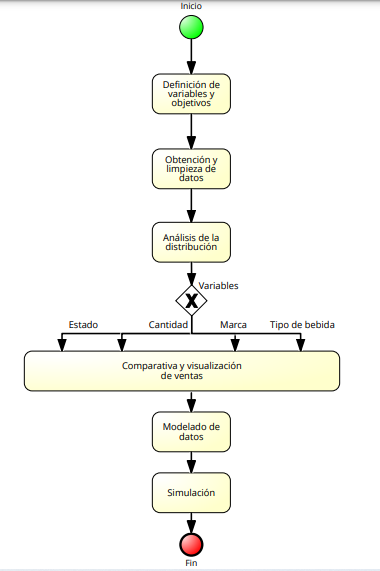

### 1.5 Definición de hipótesis y supuestos.

Supuestos:
- Los datos de las órdenes de compra por producto son independientes, cada cliente solicita sus pedidos de manera separada.
- Como la muestra de datos es muy grande, se intentará aproximar la distribución de los datos a una distribución normal.

Hipótesis:
- De los tipos de bebida, los wines (vinos) tienen mayor probabilidad de venta que los spirits (otros licores).
- California es el estado con mayor distribución de ventas, por ser el estado más poblado de EE.UU.
- La marca más vendida es Woodbridge by Robert Mondavi porque es la de mayor renombre.

### 1.6 Obtención de bases de datos
> La base de datos la obtuvimos de parte la empresa Constellation Brands Inc, por medio de un archivo de Excel, mismo que se cargará a este cuaderno de Jupyter para su posterior análisis. Se obtuvo este archivo por medio de Ana María, ya que ella actualmente es becaria en Constellation Brands como analista financiero y tiene acceso a dicha información.

### 1.7 Visualización de resultados de simulación.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import seaborn as sns
import statsmodels.api as sm
from distfit import distfit

**Carga de datos**

In [2]:
consbrand = pd.read_excel("Sales report.xlsx")
consbrand.head(5)

,Sales Order Number,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Sales Order Creation Date,Customer Service Rep Name,Material Description,Order Quantity,Unit Price,Total Amount,Product Hierarchy Description,Total Liters (L),Varietal/Blend Description,Delivery Date,9LE QTY,Unnamed: 15
0,124887,SGWS - AR (N LITTLE ROCK),AR,US,2021-02-27,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
1,126727,WYOMING LIQ COMMISSION - WY,WY,US,2021-02-28,KRISTIAN SMALDONE,SNCH CHRD NPV 18 750ML/6,1,101.97,101.97,THE SNITCH,4.5,CHARDONNAY,2021-03-11,1,NaN
2,126745,SGWS - AR (N LITTLE ROCK),AR,US,2021-02-28,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
3,126815,UTAH LIQ CONTROL COMMISSION - UT,UT,US,2021-02-28,KRISTIAN SMALDONE,JRG BRUT AMER 750ML/12 SC,1,28.54,28.54,J ROGET,9.0,BRUT,2021-08-04,1,NaN
4,126865,EDER BROS - CT,CT,US,2021-02-28,CHERI MCCAULEY,BMB RSV WHSKE 750ML/6 6,30,219.40,6582.00,BELLE MEADE BOURBON RESERVE,135.0,WHISKY,2021-04-23,15,NaN


In [3]:
dtypes = consbrand.dtypes
dtypes.head(10)

Sales Order Number                    int64
Sold-To Party Name                   object
Sold-To Party State                  object
Sold-To Party Country                object
Sales Order Creation Date    datetime64[ns]
Customer Service Rep Name            object
Material Description                 object
Order Quantity                        int64
Unit Price                          float64
Total Amount                        float64
dtype: object

Podemos observar en este resumen el tipo de datos con los que contamos. 

- Siete de las variables de nuestra base de datos son texto almacenados como objetos (object).
- Dos variables son de tipo fecha (datetime64[ns]).
- Cuatro variables son numéricas flotantes (float64).
- Y dos variables son numéricas enteras (int64).


In [4]:
resume1 = consbrand.describe(include=[object]) 
resume1

,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Customer Service Rep Name,Material Description,Product Hierarchy Description,Varietal/Blend Description,9LE QTY
count,73861,73861,73861,73861,73861,73861,73861,73861
unique,345,49,1,18,625,119,84,924
top,PLCB - PA (HARRISBURG),PA,US,CHRIS MARQUIS,SVED VODKA 1.75LT/6 SC,WOODBRIDGE BY ROBERT MONDAVI,VODKA,1
freq,11550,11584,73861,13705,2274,16367,7139,7166


Se analizan las variables de texto almacenados como objetos:
- Se observa que para todas las variables contamos con 73,861 datos.
- Se observa que contamos con un solo país: EE.UU. y con 49 estados.
- Existen 18 representantes de ventas.
- Existen 84 variedades de vinos / licores.
- Existen 345 clientes y 625 productos diferentes.

In [5]:
resume2 = consbrand.describe(exclude=[object]) 
resume2

<ipython-input-5-ee884d1fa6c7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume2 = consbrand.describe(exclude=[object])
<ipython-input-5-ee884d1fa6c7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume2 = consbrand.describe(exclude=[object])


,Sales Order Number,Sales Order Creation Date,Order Quantity,Unit Price,Total Amount,Total Liters (L),Delivery Date,Unnamed: 15
count,73861.000000,73861,73861.000000,73861.000000,73861.000000,73861.000000,73861,0.0
unique,NaN,217,NaN,NaN,NaN,NaN,209,NaN
top,NaN,2021-09-13 00:00:00,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,NaN
freq,NaN,2971,NaN,NaN,NaN,NaN,3735,NaN
first,NaN,2021-02-27 00:00:00,NaN,NaN,NaN,NaN,2021-03-04 00:00:00,NaN
last,NaN,2021-10-19 00:00:00,NaN,NaN,NaN,NaN,2021-11-22 00:00:00,NaN
mean,162531.560269,NaN,136.150160,86.797674,10005.301342,1168.550308,NaN,NaN
std,11934.332771,NaN,271.328098,64.719844,23494.404984,2401.764911,NaN,NaN
min,124887.000000,NaN,0.000000,0.034150,2.200000,0.202000,NaN,NaN
25%,153913.000000,NaN,11.000000,48.600000,730.800000,81.000000,NaN,NaN


Se analizan las demás variables:
- Se observa que para todas las variables contamos con 73,861 datos.
- Se observa que no existen valores vacíos (NAN values).
- Se observan mínimos, máximos, media y desviación estándar.

In [136]:
#FUNCIONES AUTOGENERADAS

#Kernel
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEMultivariate(x, bw = 'cv_ml', var_type='c', **kwargs)
    return(kde.pdf(x_grid))

def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

#Funcion de generacion de la distribucion discreta.
def distri_dis(p_acum, indices, N):
    U =np.random.rand(N)
    val2id = {i:val_i for i, val_i in enumerate(indices)}
    V = pd.Series([sum([1 for i in p_acum if i < ui]) for ui in U]).map(val2id)
    return(V)

def redu_var(p_acum, indices, U):
    #p_acum, es la lista de probabildad acumulada.
    #índices, son los valores reales.
    #U, cantidad de numeros aleatorias a generar.
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return(y)

def estra_i_espa(B): #igualmente espaciado
    U_estra = (np.random.rand(B) + np.arange(0, B))/B
    return(U_estra)   

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return(kde.evaluate(x_grid))

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return(np.exp(log_pdf))

def plot_Acep_rechazo(R2, R1, f, t):
    f_x = f
    t_x = t
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob',markersize=1) if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o',
                                                                                  markersize=1) for i in range(len(R1))]
    plt.show()

def best_fit_distribution(data, bins=200, ax=None):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    DISTRIBUTIONS = [st.alpha,st.cauchy,
                     st.cosine,st.laplace,
                     st.levy,
                     st.levy_l,
                     st.norm, 
                     st.beta,
                     st.chi, 
                     st.chi2,
                     st.dgamma,
                     st.dweibull,
                     st.erlang,
                     st.expon,
                     st.exponnorm,
                     st.exponweib,
                     st.exponpow]        
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    for distribution in DISTRIBUTIONS:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
        except Exception:
            pass
    return(best_distribution.name, best_params)

#función de chi cuadrada
def Chi_2(Y, best_dist):
    dist = getattr(st, best_dist)
    J = len(Y)
    hist, bin_edges = np.histogram(Y, bins=(J))
    bins = bin_edges[1]-bin_edges[0]
    freq = (hist/(bins*sum(hist)))
    x = np.linspace(min(Y),max(Y), J)
    param = dist.fit(Y)
    pi = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    Y_np = np.array(Y)
    Ei = Y_np*pi
    X_chi = st.chisquare(freq,Ei)
    print('Valor de chi cuadrado librería = ', X_chi)
    p = 4 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad
    Chi_est = st.chi2.ppf(q = 0.95,df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    d = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(len(U)))))
    return d

## Nodo 1: Estado, consbrand['Sold-To Party State']

Esta es una variable de tipo cualitativa.

Para trabajar con ella, optamos por cambiar el texto de la variable Estado (Sold-To Party State) por números consecutivos de la siguiente forma:

In [7]:
consbrand['Sold-To Party State'].replace(['AR', 'WY', 'UT', 'CT', 'ID', 'GA', 'MT', 'IL', 'CA', 'NY', 'MS',
       'MA', 'FL', 'NJ', 'NC', 'VA', 'HI', 'KS', 'NV', 'TN', 'LA', 'WA',
       'IN', 'ME', 'TX', 'MD', 'AZ', 'RI', 'OH', 'PA', 'SC', 'MN', 'MI',
       'CO', 'NE', 'IA', 'OR', 'NH', 'KY', 'SD', 'MO', 'DE', 'NM', 'AL',
       'VT', 'OK', 'WI', 'ND', 'WV'], np.arange(1,50), inplace=True)
consbrand.head()

,Sales Order Number,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Sales Order Creation Date,Customer Service Rep Name,Material Description,Order Quantity,Unit Price,Total Amount,Product Hierarchy Description,Total Liters (L),Varietal/Blend Description,Delivery Date,9LE QTY,Unnamed: 15
0,124887,SGWS - AR (N LITTLE ROCK),1,US,2021-02-27,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
1,126727,WYOMING LIQ COMMISSION - WY,2,US,2021-02-28,KRISTIAN SMALDONE,SNCH CHRD NPV 18 750ML/6,1,101.97,101.97,THE SNITCH,4.5,CHARDONNAY,2021-03-11,1,NaN
2,126745,SGWS - AR (N LITTLE ROCK),1,US,2021-02-28,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
3,126815,UTAH LIQ CONTROL COMMISSION - UT,3,US,2021-02-28,KRISTIAN SMALDONE,JRG BRUT AMER 750ML/12 SC,1,28.54,28.54,J ROGET,9.0,BRUT,2021-08-04,1,NaN
4,126865,EDER BROS - CT,4,US,2021-02-28,CHERI MCCAULEY,BMB RSV WHSKE 750ML/6 6,30,219.40,6582.00,BELLE MEADE BOURBON RESERVE,135.0,WHISKY,2021-04-23,15,NaN


### Método de la transformada inversa

In [8]:
#MÉTODO DE LA TRANFORMADA INVERSA
print('Número de estados: ', consbrand['Sold-To Party State'].nunique())
state = consbrand.groupby("Sold-To Party State").count()
state_acum = pd.DataFrame(index = state.index)
freq = state['Sales Order Number'].values
freq #Cantidad

Número de estados:  49


array([  589,   384,  1327,   879,   685,  1500,  1144,  1150,  2386,
        2050,  1238,   737,  2707,  1176,  9639,  1461,  1649,   487,
        1046,  1891,   581,   861,   874,  1401,  2226,  1505,   892,
         392,  3313, 11584,   928,  1142,  2586,   843,   511,   931,
         838,  1606,   608,    24,  1512,   521,   494,   751,   473,
         498,  1124,    58,   659], dtype=int64)

**Histograma de distribución del nodo**

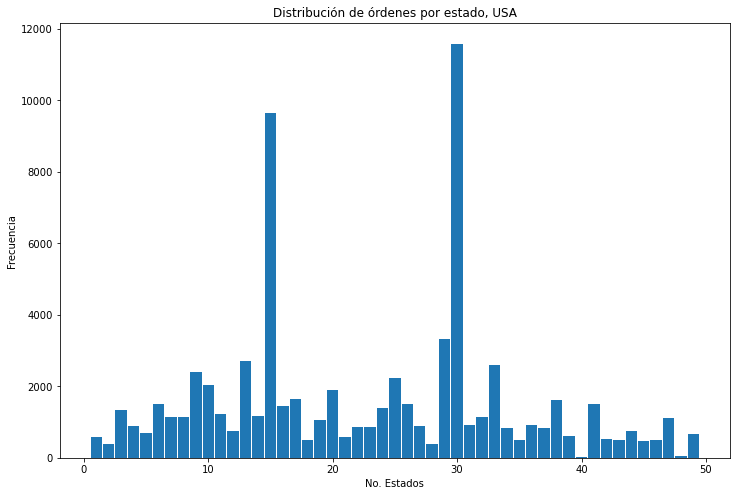

In [9]:
plt.figure(figsize=(12,8))
plt.bar(state.index, freq, width = .92)
plt.title('Distribución de órdenes por estado, USA')
plt.ylabel('Frecuencia')
plt.xlabel('No. Estados')
plt.show()

Se observa en el histograma cómo están distribuidos los datos por Estado, del uno al 49. Dichos datos tienen como valores máximos 11,584 unidades,  mínimo de 24 unidades y una media de 1,507.36.

In [10]:
freq.max(), freq.min(), freq.mean()

(11584, 24, 1507.3673469387754)

**Histograma de distribución acumulada**

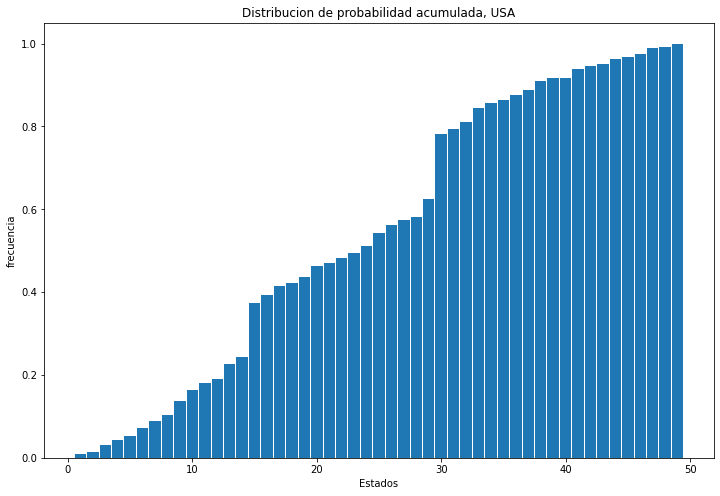

In [11]:
#Cumulative Probability
state_acum['Probability'] = freq/len(consbrand)
state_acum['Cumulative'] = np.cumsum(freq/len(consbrand))
plt.figure(figsize=(12,8))
plt.bar(state.index, state_acum['Cumulative'], width = .92)
plt.title('Distribucion de probabilidad acumulada, USA')
plt.ylabel('frecuencia')
plt.xlabel('Estados')
plt.show()

Se obtuvo la probabilidad de cada estado, así como su probabilidad acumulada y se graficó.

**Generación de una distribución aleatoria**

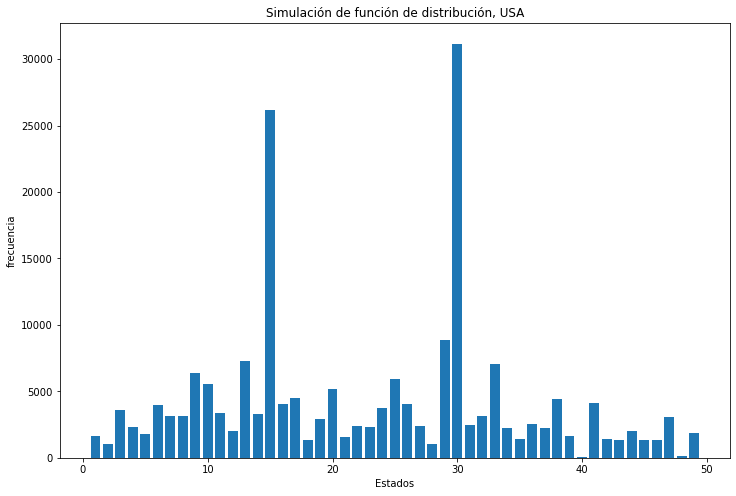

In [12]:
#Generación de distribución aleatoria
distri_diss = distri_dis(state_acum['Cumulative'].values, state.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(12,8))
plt.bar(state.index, distri_diss.value_counts(sort = False))
plt.title('Simulación de función de distribución, USA')
plt.ylabel('frecuencia')
plt.xlabel('Estados')
plt.show()

Con base a nuestros datos, generamos una nueva distribución con variables aleatorias. Se observa en la gráfica la misma. Como observamos en la siguiente línea, esta simulaión nos regresa valores de aleatorios de estados, igualmente distribuidos que que nuestros datos, donde reemplazamos los nombres de estados por un número ordinal.

In [13]:
distri_diss.max(), distri_diss.min(), distri_diss.mean()

(49, 1, 22.93801)

### Técnica de reducción de varianza

In [14]:
#TÉCNICA DE REDUCCION DE VARIANZA
print("Media distribución discreta: ", 
      round((consbrand['Sold-To Party State']*state_acum['Probability']).sum(),2))

Media distribución discreta:  5.1


**Media por método Montecarlo**

In [15]:
#MEDIA POR METODO MONTECARLO
montecacr = distri_diss.mean()
print('Media Montecarlo crudo', round(montecacr,2))

Media Montecarlo crudo 22.94


**Media por muestreo estratificado 1**

In [16]:
#POR MUESTREO ESTRATIFICADO 1
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(state_acum['Cumulative'], 
                                    consbrand['Sold-To Party State'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

Media muestreo estratificado(1): 5.7


**Media por muestreo estratificado 2**

In [17]:
#POR MUESTREO ESTRATIFICADO 2
m3 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

Media muestreo estratificado(2):  5.03


**Media por números complementarios**

In [18]:
#POR NÚMEROS COMPLEMENTARIOS
m4 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media números complementarios: ', round(np.mean(m4), 2))

Media números complementarios:  5.03


### Prueba de Bondad y Ajuste


In [19]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("Media (MonteCarlo): ", round(consbrand['Sold-To Party State'].mean(), 2))
print("Desviacón estandar: ", round(consbrand['Sold-To Party State'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Sold-To Party State']),2), "vs", 
      round(np.std(consbrand['Sold-To Party State'])/np.sqrt(len(consbrand['Sold-To Party State'])),2))
#Podemos calcular la varianza ya que estas son variables independientes.

Media (MonteCarlo):  22.92
Desviacón estandar:  11.49
Varianza:  0.04 vs 0.04


**Intervalo de confianza**

In [20]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Sold-To Party State'].mean(), 
                     consbrand['Sold-To Party State'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (22.88572542588411, 23.005302216729753)
Intervalo al 95% de confianza:  (22.874271351713105, 23.01675629090076)
Intervalo al 99% de confianza:  (22.851884691452085, 23.03914295116178)


**Prueba de Hipótesis Nula**

In [21]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, montecacr)
print('Prueba de hipotesis: ', H0)

#ESTADÍSTICO NORMALIZADO
t = (np.mean(X) - montecacr)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipotesis:  Ttest_1sampResult(statistic=0.20644143313330718, pvalue=0.8364465291275044)
Estadístico de prueba teórico:  0.20644
Región de rechazo: (t < -0.8352) U (t > 0.8352)


El valor de PValue (0.9379) es un valor mayor al índice de confianza (0.05) previamente definido, por lo tanto **NO rechazamos** la media calculada en la simulación; así mismo, el estadístico está **DENTRO de la región de aceptación.**

### Kernel Density Estimation (KDE)

<AxesSubplot:xlabel='Sold-To Party State', ylabel='Density'>

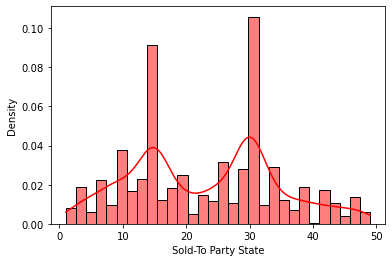

In [22]:
sns.histplot(data=consbrand['Sold-To Party State'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=30)

<AxesSubplot:xlabel='Sold-To Party State', ylabel='Density'>

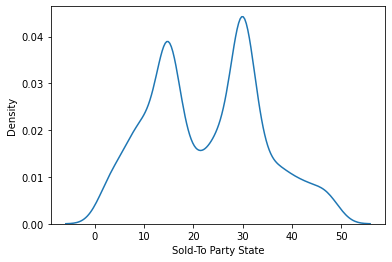

In [23]:
sns.kdeplot(data=consbrand['Sold-To Party State'], bw_method=0.2)

## Nodo 2: Cantidad del pedido, consbrand['Order Quantity']

(Cantidad de cajas de botellas por producto)

Esta variable es de tipo entero; por lo tanto, se trata de una variable de tipo **cuantitativa discreta.**

### Método de la Transformada inversa

In [24]:
botellas = consbrand.groupby("Order Quantity").count()
#METODO DE LA TRANFORMADA INVERSA
botellas_acum = pd.DataFrame(index = botellas.index)
freqb = botellas['Sales Order Number'].values
freqb[0:50]

array([ 189, 6389, 3049, 1688, 1187, 1440,  855,  823,  752,  651, 1061,
       1239,  525,  514, 3542,  799, 2089,  560,  675,  335, 1077,  607,
        977,  251,  309,  298,  288,  244, 2158,  208,  586,  163, 1120,
        396,  219,  133,  309,  167,  150,  153,  612,  114,  663,  121,
        744,  255,  100,   96,  456,   91], dtype=int64)

**Histograma de distribución del nodo**

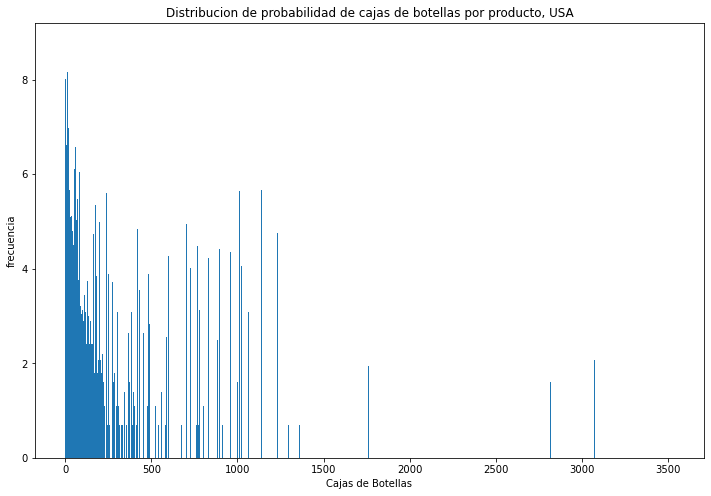

In [25]:
plt.figure(figsize=(12,8))
plt.bar(botellas.index, np.log(freqb), width = .92)
plt.title('Distribucion de probabilidad de cajas de botellas por producto, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

En esta gráfica se puede observar cómo están distribuidas las cajas de botellas que se piden por orden de compra por producto. Graficamos el log de la distribución para tener una mejor visibilidad de la información y tomar mejores desiciones. Caso contrario la escala entre unas barras y otras dificultaba el poder registrar conclusiones.

**Histograma de distribución acumulado**

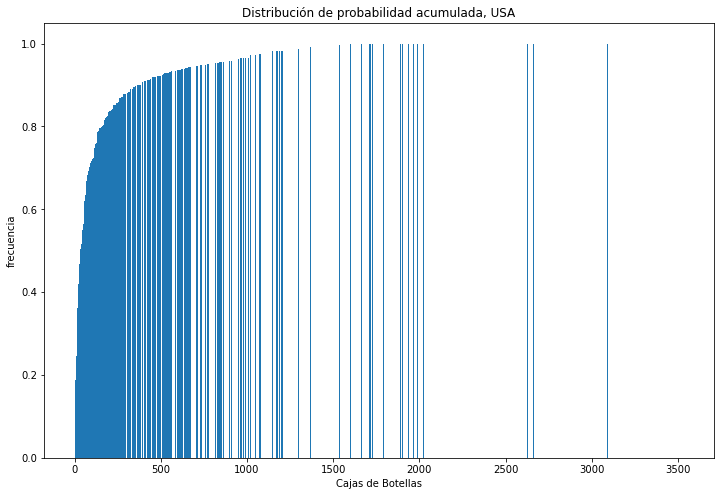

In [26]:
botellas_acum['Probability'] = freqb/len(consbrand)
botellas_acum['Cumulative'] = np.cumsum(freqb/len(consbrand))
#Cumulative
plt.figure(figsize=(12,8))
plt.bar(botellas.index, botellas_acum['Cumulative'], width = .92)
plt.title('Distribución de probabilidad acumulada, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

En este histograma se puede observar la distribución de probabilidad acumulada, una vez que la calculamos. Podemos concluir que dicha gráfica, muestra cerca del 90% de la información útil en las primeras 390 observaciones. Decidimos dejar el total de la información para no dar conclusiones sesgadas a una marca o estado y poder dar la mejor estimación de la media.

In [27]:
freqb.max(), freqb.min(), freqb.mean()

(6389, 1, 83.45875706214689)

In [28]:
botellas_acum['Cumulative'].head(390)

Order Quantity
0      0.002559
1      0.089059
2      0.130339
3      0.153193
4      0.169264
         ...   
397    0.908612
398    0.908639
400    0.909465
401    0.909546
402    0.909587
Name: Cumulative, Length: 390, dtype: float64

**Generación de una distribución aleatoria**

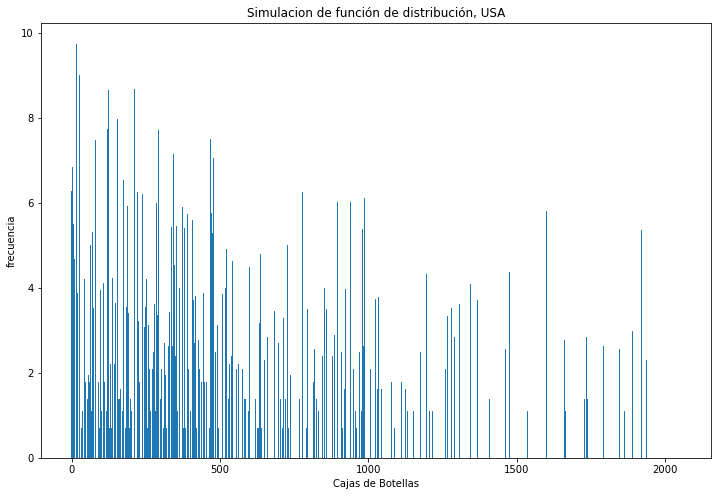

In [29]:
distri_dissb = distri_dis(botellas_acum['Cumulative'].values, botellas.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(12,8))
plt.bar(botellas.index[0:len(distri_dissb.value_counts(sort = False))], np.log(distri_dissb.value_counts(sort = False)))
plt.title('Simulacion de función de distribución, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

A partir de nuestra distribución de los datos real, generamos una nueva distribución con variables aleatorias, como se observa en el histograma.

### Técnica de Reducción de Varianza

In [30]:
#TÉCNICA DE REDUCCIÓN DE VARIANZA
print("Media distribución discreta: ", 
      round((consbrand['Order Quantity']*botellas_acum['Probability']).sum(),2))

Media distribución discreta:  91.69


**Media por Montecarlo**

In [31]:
#MEDIA POR MÉTODO MONTECARLO
montecacrb = distri_dissb.mean()
print('Media Montecarlo crudo', round(montecacrb,2))

Media Montecarlo crudo 136.47


**Media por muestreo estratificado 1**

In [32]:
#MUESTREO ESTRATIFICADO
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(botellas_acum['Cumulative'], 
                                    consbrand['Order Quantity'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

Media muestreo estratificado(1): 122.74


**Media por muestreo estratificado 2**

In [33]:
m3 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

Media muestreo estratificado(2):  93.45


**Media por números complementarios**

In [34]:
#NÚMEROS COMPLEMENTARIOS
m4 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media números complementarios: ', round(np.mean(m4), 2))

Media números complementarios:  93.35


### Prueba de Bondad y Ajuste

In [35]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("Media (MonteCarlo): ", round(consbrand['Order Quantity'].mean(), 2))
print("Desviación estandar: ", round(consbrand['Order Quantity'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Order Quantity']),6), "vs", 
      round(np.std(consbrand['Order Quantity'])/np.sqrt(len(consbrand['Order Quantity'])),6))
#Podemos calcular la varianza ya que estas son variables independientes.

Media (MonteCarlo):  136.15
Desviación estandar:  271.33
Varianza:  0.99836 vs 0.998353


**Intervalo de confianza**

In [36]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Order Quantity'].mean(), 
                     consbrand['Order Quantity'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (135.30266664014968, 138.12677631489564)
Intervalo al 95% de confianza:  (135.03214958200792, 138.3972933730374)
Intervalo al 99% de confianza:  (134.50343173148454, 138.92601122356078)


**Prueba de Hipótesis Nula**

In [37]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, montecacrb)
print('Prueba de hipótesis: ', H0)

#ESTADÍSTICO NORMALIZADO
t = (np.mean(X) - montecacrb)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipótesis:  Ttest_1sampResult(statistic=0.28494787672428457, pvalue=0.7756846655043622)
Estadístico de prueba teórico:  0.28495
Región de rechazo: (t < -0.8352) U (t > 0.8352)


La prueba nos arroja un PValue de 0.2121; como el valor es grande, **NO RECHAZO.**

Sin embargo, el estadístico obtenido de 1.2477 se encuentra **FUERA de la región de aceptación.**

### Kernel Density Estimation (KDE)

<AxesSubplot:xlabel='Order Quantity', ylabel='Density'>

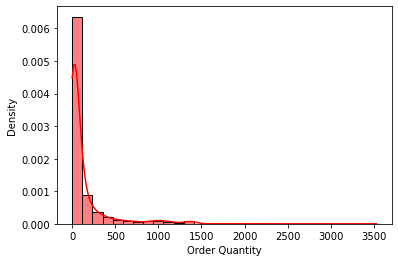

In [38]:
sns.histplot(data=consbrand['Order Quantity'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=30)

<AxesSubplot:xlabel='Order Quantity', ylabel='Density'>

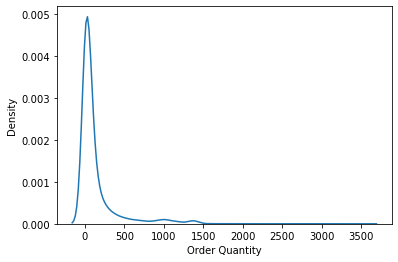

In [39]:
sns.kdeplot(data=consbrand['Order Quantity'], bw_method=0.2)

### Conclusiones de los primeros dos nodos

Como nuestras primeras dos variables son de tipo discreto, no se ha podido realizar el ajuste conforme a las tramas Q-Q.

Para nuestra primer variable que era de tipo cualitativo, representada en texto, optamos por reemplazar esos valores por números consecutivos para identificarlos y así poder obtener sus métricas como media y desviación estándar; sin embargo, de manera lógia, no se pueden obtener estas métricas para variables cualitativas, puesto que no representan números por sí solos los valores de esta variable.

Para la segunda variable, también de tipo discreto, realizamos un procedimiento similar pero sin hacer reemplazos, puesto que estos valores ya vienen dados en cantidades (enteros, por ser cantidades de cajas).

# CAMBIAR DIAGRAMA DE LOS NODOS

## Nodo 3:

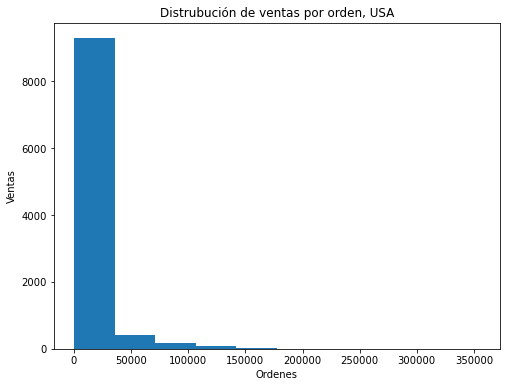

In [40]:
sales = consbrand['Total Amount'].sample(n=10000, random_state=1)

plt.figure(figsize=(8,6))
plt.hist(sales)
plt.title('Distrubución de ventas por orden, USA')
plt.ylabel('Ventas')
plt.xlabel('Ordenes')
plt.show()

In [41]:
sales.min(), sales.max(), sales.mean(), sales.std()

(5.19, 355047.84, 9719.912857999969, 22400.272413985622)

C:\Users\jose.aceves\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
C:\Users\jose.aceves\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


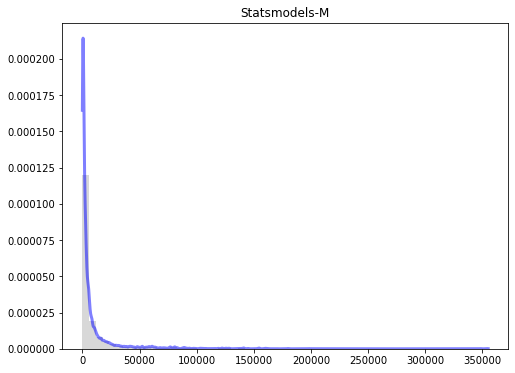

In [42]:
grid1 = np.linspace(sales.min(),sales.max(), 10000)
kd1 = kde_statsmodels_m(sales, grid1, bandwidth = 0.05)
plt.figure(figsize=(8, 6))
plt.plot(grid1, kd1, color='blue', alpha=0.5, lw=3)
plt.hist(sales, 60, fc='grey', histtype='stepfilled', alpha=0.3, density=True)
plt.title('Statsmodels-M')
plt.show()

<AxesSubplot:xlabel='Total Amount', ylabel='Density'>

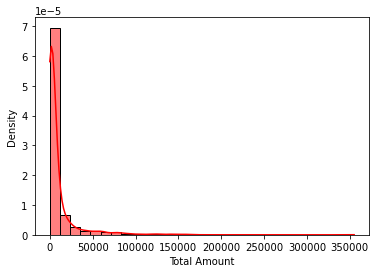

In [43]:
sns.histplot(data = sales, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=30)

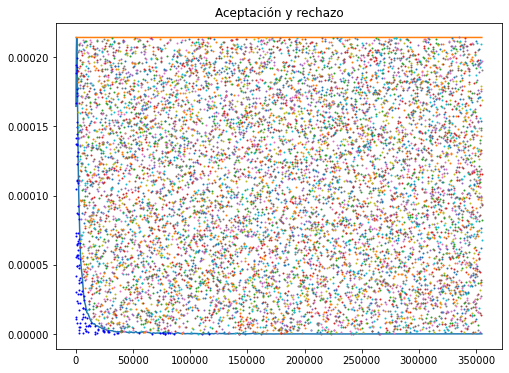

In [44]:
#Aceptación y rechazo
plt.figure(figsize=(8, 6))
t = np.max(kd1) * np.ones(len(grid1))
plt.title('Aceptación y rechazo')
plt.plot(grid1, kd1)
plt.plot(grid1, t)
plot_Acep_rechazo(np.random.rand(10000), grid1, kd1, t)

In [63]:
#Prueba de hipotesis
dist_continuas = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
errores = []

for dist in dist_continuas[0:30]:
    param = getattr(st, dist).fit(sales)
    pdf = getattr(st, dist).pdf(x, *param)
    errores.append(((y - pdf) **2).mean())
    f_min=errores.index(min(errores))
    error_min=min(errores)
    
r = pd.DataFrame()
r['Función'] = dist_continuas[0:30]
r['Error']= errores
r.set_index('Función', inplace = True)

In [66]:
r = r.sort_values('Error')
r.head()

,Error
Función,
exponnorm,5.097652e-11
genexpon,5.103798e-11
expon,5.104161e-11
foldnorm,6.392370e-11
erlang,8.576610e-11


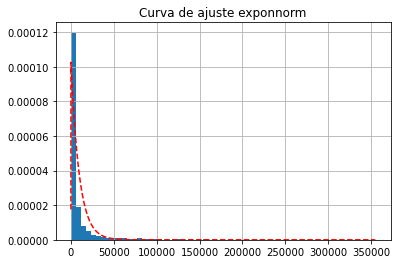

In [91]:
dist = 'exponnorm'
params = getattr(st, dist).fit(sales)
x = np.arange(sales.min(), sales.max(), .01)
y = getattr(st, dist).pdf(x, *params)

plt.figure(figsize=(6, 4))
plt.hist(sales, 60, density=True)
plt.plot(x, y,'r--')
plt.title('Curva de ajuste exponnorm')
plt.grid()

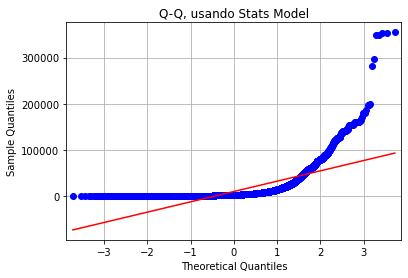

In [90]:
grap1 = sm.qqplot(sales, line='s')
plt.title('Q-Q, usando Stats Model')
plt.grid()
plt.show()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.03 sec] [RSS: 0.0000000] [loc=9719.913 scale=22399.152]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000000] [loc=5.190 scale=9714.723]
[distfit] >[pareto    ] [0.09 sec] [RSS: 0.0000000] [loc=-0.002 scale=5.192]
[distfit] >[dweibull  ] [0.12 sec] [RSS: 0.0000000] [loc=157.960 scale=5013.561]
[distfit] >[t         ] [0.10 sec] [RSS: 0.0000000] [loc=1268.588 scale=1374.292]
[distfit] >[genextreme] [0.22 sec] [RSS: 0.0000000] [loc=8.357 scale=15.946]
[distfit] >[gamma     ] [0.11 sec] [RSS: 0.0000000] [loc=5.190 scale=4.347]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.0000000] [loc=4.333 scale=2240.981]
[distfit] >[beta      ] [0.23 sec] [RSS: 0.0000000] [loc=5.190 scale=1058976.953]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0000000] [loc=5.190 scale=355042.650]
[distfit] >[loggamma  ] [0.13 sec] [RSS: 0.0000000] [loc=-4128607.409 scale=629783.810]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nloc=5.19, scale=9714.72'}, xlabel='Values', ylabel='Frequency'>)

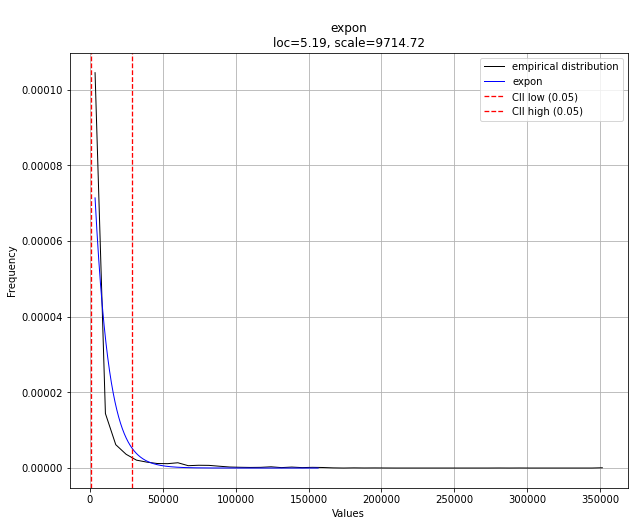

In [93]:
dist = distfit()
dist.fit_transform(sales)
dist.plot()

$H_0$: La distribución es exponencial

$H_a$: Los datos no se distribuyen exponenciales

In [176]:
#Prueba de Chi2
Chi_2(sales, 'exponnorm')

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=1657165.2412867623, pvalue=0.0)
Estadístico de chi_cuadrado =  10228.690734655074


Como el valor es grande, no rechazo; es decir, *se acepta $H_0$*.

In [175]:
#Tecnicas de reduccion de varianza
#MONTECARLO CRUDO
prob = sales.value_counts()/len(sales)
prob_acum_sales = np.cumsum(prob)
monteccs = Gen_distr_discreta(np.random.rand(10000) , prob_acum_sales).mean()

#MUESTREO ESTRATIFICADO
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(sales)*.30/len(sales))/.3,
     (len(sales)*.30/len(sales))/.4 ,
     (len(sales)*.30/len(sales))/.3] 
m2= list(map(lambda ui, wi: redu_var(prob_acum_sales, 
                                    sales, 
                                    ui)/wi, e, w))
#MUESTREO ESTRAFICADO 2
m3 = redu_var(prob_acum_sales, 
              sales, 
              estra_i_espa(10000))

#NÚMEROS COMPLEMENTARIOS
m4 = redu_var(prob_acum_sales, 
              sales,  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))

print("Media distribución real: ", round(sales.mean(),2))
print('Media montecarlo crudo :', round(monteccs,2))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))
print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))
print('Media números complementarios: ', round(np.mean(m4), 2))


Media distribución real:  9719.91
Media montecarlo crudo : 2085.43
Media muestreo estratificado(1): 12924.27
Media muestreo estratificado(2):  9805.91
Media números complementarios:  9506.13


In [179]:
#PRUEBA DE BONDAD Y AJUSTE
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(sales.mean(), sales.std(), 100000)
intervalo1 = st.t.interval(.90, len(X)-1, loc = np.mean(X), scale = st.sem(X))
intervalo2 = st.t.interval(.95, len(X)-1, loc = np.mean(X), scale = st.sem(X))
intervalo3 = st.t.interval(.99, len(X)-1, loc = np.mean(X), scale = st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (9649.945567328696, 9883.098073403044)
Intervalo al 95% de confianza:  (9627.61225265412, 9905.431388077619)
Intervalo al 99% de confianza:  (9583.962428088842, 9949.081212642897)


$H_0$: La distribución es normal

$H_a$: Los datos no se distribuyen de manera normal.

In [180]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, monteccs)
print('Prueba de hipotesis: ', H0)

#ESTADÍSTICO NORMALIZADO
confianza = .05
t = (np.mean(X) - monteccs)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipotesis:  Ttest_1sampResult(statistic=108.37879827963862, pvalue=0.0)
Estadístico de prueba teórico:  108.37934
Región de rechazo: (t < -0.8352) U (t > 0.8352)


Como el valor de PValue es 0.0 rechazamos la hipotesis nula, por lo que concluimos que los datos NO se ajustan a una distribuciión normal. Además de esto, el estadístico de prueba no entra en la región de aceptación.

## Nodo 4:

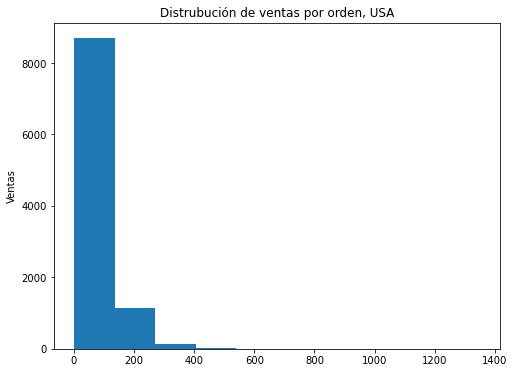

In [188]:
unitprice = consbrand['Unit Price'].sample(n = 10000, random_state=1)
plt.figure(figsize=(8,6))
plt.hist(unitprice)
plt.title('Distrubución de ventas por orden, USA')
plt.ylabel('Ventas')
plt.show()

In [191]:
unitprice.min(), unitprice.max(), unitprice.mean(), unitprice.std()

(0.06919, 1350.0, 86.36046891899916, 60.88401820885708)

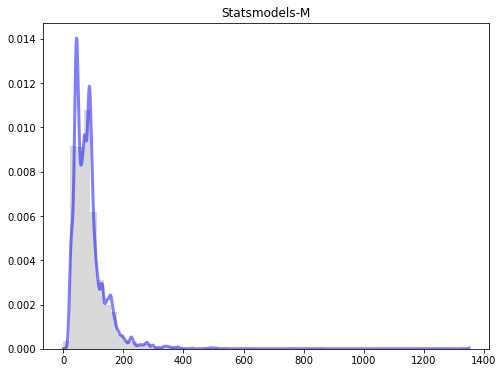

In [194]:
grid2 = np.linspace(unitprice.min(),unitprice.max(), 10000)
kd2 = kde_statsmodels_m(unitprice, grid2, bandwidth = 0.05)
plt.figure(figsize=(8, 6))
plt.plot(grid2, kd2, color='blue', alpha=0.5, lw=3)
plt.hist(unitprice, 60, fc='grey', histtype='stepfilled', alpha=0.3, density=True)
plt.title('Statsmodels-M')
plt.show()

<AxesSubplot:xlabel='Unit Price', ylabel='Density'>

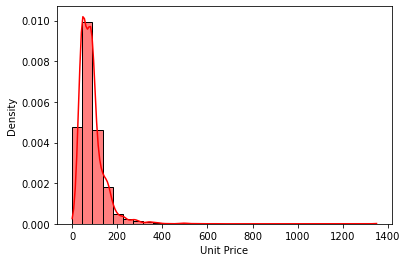

In [195]:
sns.histplot(data = unitprice, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=30)

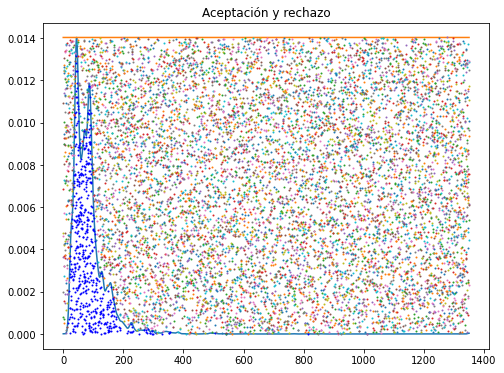

In [196]:
#Aceptación y rechazo
plt.figure(figsize=(8, 6))
t = np.max(kd2) * np.ones(len(grid2))
plt.title('Aceptación y rechazo')
plt.plot(grid2, kd2)
plt.plot(grid2, t)
plot_Acep_rechazo(np.random.rand(10000), grid2, kd2, t)

In [222]:
#Prueba de hipotesis
#Prueba de hipotesis
dist_continuas = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
errores = []

for dist in dist_continuas[0:30]:
    param = getattr(st, dist).fit(unitprice)
    pdf = getattr(st, dist).pdf(x, *param)
    errores.append(((y - pdf) **2).mean())
    f_min=errores.index(min(errores))
    error_min=min(errores)
    
r = pd.DataFrame()
r['Función'] = dist_continuas[0:30]
r['Error']= errores
r.set_index('Función', inplace = True)

In [226]:
r = r.sort_values('Error')
r.head()

,Error
Función,
exponnorm,0.000000e+00
f,5.601956e-08
betaprime,6.293734e-08
genextreme,6.805716e-08
fatiguelife,1.078582e-07


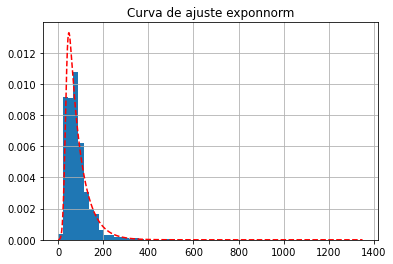

In [236]:
dist = 'exponnorm'
params = getattr(st, dist).fit(unitprice)
x = np.arange(unitprice.min(), unitprice.max(), .01)
y = getattr(st, dist).pdf(x, *params)

plt.figure(figsize=(6, 4))
plt.hist(unitprice, 60, density=True)
plt.plot(x, y,'r--')
plt.title('Curva de ajuste exponnorm')
plt.grid()

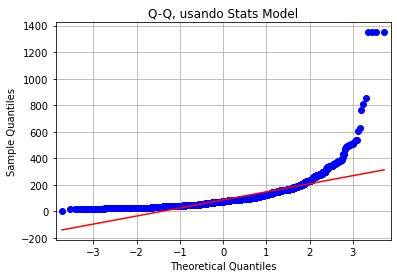

In [237]:
grap1 = sm.qqplot(unitprice, line='s')
plt.title('Q-Q, usando Stats Model')
plt.grid()
plt.show()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000543] [loc=86.360 scale=60.881]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.0001202] [loc=0.069 scale=86.291]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.0002536] [loc=-2.117 scale=2.187]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.0000323] [loc=75.152 scale=36.581]
[distfit] >[t         ] [0.11 sec] [RSS: 0.0000265] [loc=73.848 scale=30.976]
[distfit] >[genextreme] [0.28 sec] [RSS: 0.0000116] [loc=60.372 scale=30.167]
[distfit] >[gamma     ] [0.13 sec] [RSS: 0.0002769] [loc=15.320 scale=2.110]
[distfit] >[lognorm   ] [0.11 sec] [RSS: 0.0002330] [loc=0.069 scale=3.737]
[distfit] >[beta      ] [0.19 sec] [RSS: 0.0000145] [loc=-16.475 scale=2261605147024046.000]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0002494] [loc=0.069 scale=1349.931]
[distfit] >[loggamma  ] [0.15 sec] [RSS: 0.0000614] [loc=-18424.341 scale=2527.453]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngenextreme\nc=-0.23, loc=60.37, scale=30.17'}, xlabel='Values', ylabel='Frequency'>)

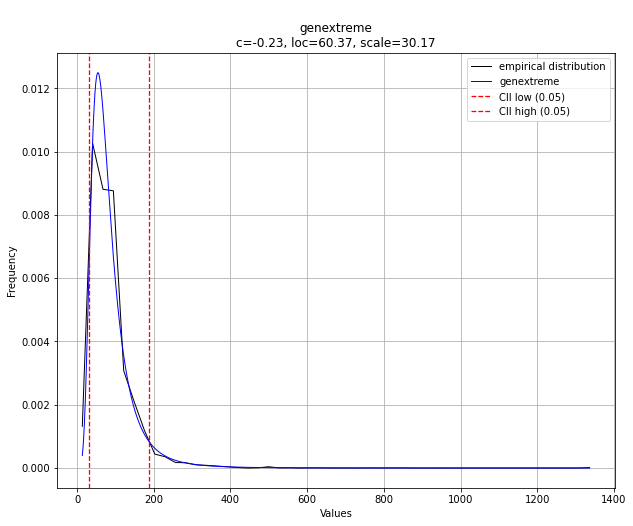

In [238]:
dist = distfit()
dist.fit_transform(unitprice)
dist.plot()

$H_0$: La distribución es exponencial

$H_a$: Los datos no se distribuyen exponenciales

In [240]:
#Prueba de Chi2
Chi_2(unitprice, 'exponnorm')

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=275537.4414505767, pvalue=0.0)
Estadístico de chi_cuadrado =  10228.690734655074


Como el valor es grande, no rechazo; es decir, se acepta $H_0$

In [241]:
#Tecnicas de reduccion de varianza
#MONTECARLO CRUDO
prob = unitprice.value_counts()/len(unitprice)
prob_acum_unitprice = np.cumsum(prob)
monteccunitprice = Gen_distr_discreta(np.random.rand(10000) , prob_acum_unitprice).mean()

#MUESTREO ESTRATIFICADO
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(sales)*.30/len(unitprice))/.3,
     (len(sales)*.30/len(unitprice))/.4 ,
     (len(sales)*.30/len(unitprice))/.3] 
m2= list(map(lambda ui, wi: redu_var(prob_acum_unitprice, 
                                    sales, 
                                    ui)/wi, e, w))
#MUESTREO ESTRAFICADO 2
m3 = redu_var(prob_acum_unitprice, 
              unitprice, 
              estra_i_espa(10000))

#NÚMEROS COMPLEMENTARIOS
m4 = redu_var(prob_acum_unitprice, 
              unitprice,  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))

print("Media distribución real: ", round(unitprice.mean(),2))
print('Media montecarlo crudo :', round(monteccunitprice,2))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))
print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))
print('Media números complementarios: ', round(np.mean(m4), 2))

Media distribución real:  86.36
Media montecarlo crudo : 416.53
Media muestreo estratificado(1): 89.51
Media muestreo estratificado(2):  82.75
Media números complementarios:  83.46


In [242]:
#PRUEBA DE BONDAD Y AJUSTE
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(unitprice.mean(), unitprice.std(), 100000)
intervalo1 = st.t.interval(.90, len(X)-1, loc = np.mean(X), scale = st.sem(X))
intervalo2 = st.t.interval(.95, len(X)-1, loc = np.mean(X), scale = st.sem(X))
intervalo3 = st.t.interval(.99, len(X)-1, loc = np.mean(X), scale = st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (86.17029757998479, 86.80400690114503)
Intervalo al 95% de confianza:  (86.10959555314417, 86.86470892798565)
Intervalo al 99% de confianza:  (85.99095517839648, 86.98334930273334)


$H_0$: La distribución es normal

$H_a$: Los datos no se distribuyen de manera normal.

In [243]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, monteccunitprice)
print('Prueba de hipotesis: ', H0)

#ESTADÍSTICO NORMALIZADO
confianza = .05
t = (np.mean(X) - monteccunitprice)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipotesis:  Ttest_1sampResult(statistic=-1713.3173857944844, pvalue=0.0)
Estadístico de prueba teórico:  -1713.32595
Región de rechazo: (t < -0.8352) U (t > 0.8352)


Como el valor de PValue es 0.0 rechazamos la hipotesis nula, por lo que concluimos que los datos NO se ajustan a una distribuciión normal. Además de esto, el estadístico de prueba no entra en la región de aceptación.

### 1.6 Conclusiones.
